In [1]:
import pandas as pd

In [12]:
data_path = '/mnt/diabetes.csv'
diabetes_data = pd.read_csv(data_path)

diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Setting seed for reproducibility
np.random.seed(42)

# Taking a random sample of 25 observations into consideration
sample_data = diabetes_data.sample(25)

# Calculating mean and maximum Glucose values for the sample
sample_mean_glucose = sample_data['Glucose'].mean()
sample_max_glucose = sample_data['Glucose'].max()

# Calculating mean and maximum Glucose values for the population
population_mean_glucose = diabetes_data['Glucose'].mean()
population_max_glucose = diabetes_data['Glucose'].max()

sample_mean_glucose, sample_max_glucose, population_mean_glucose, population_max_glucose

(116.64, 183, 120.89453125, 199)

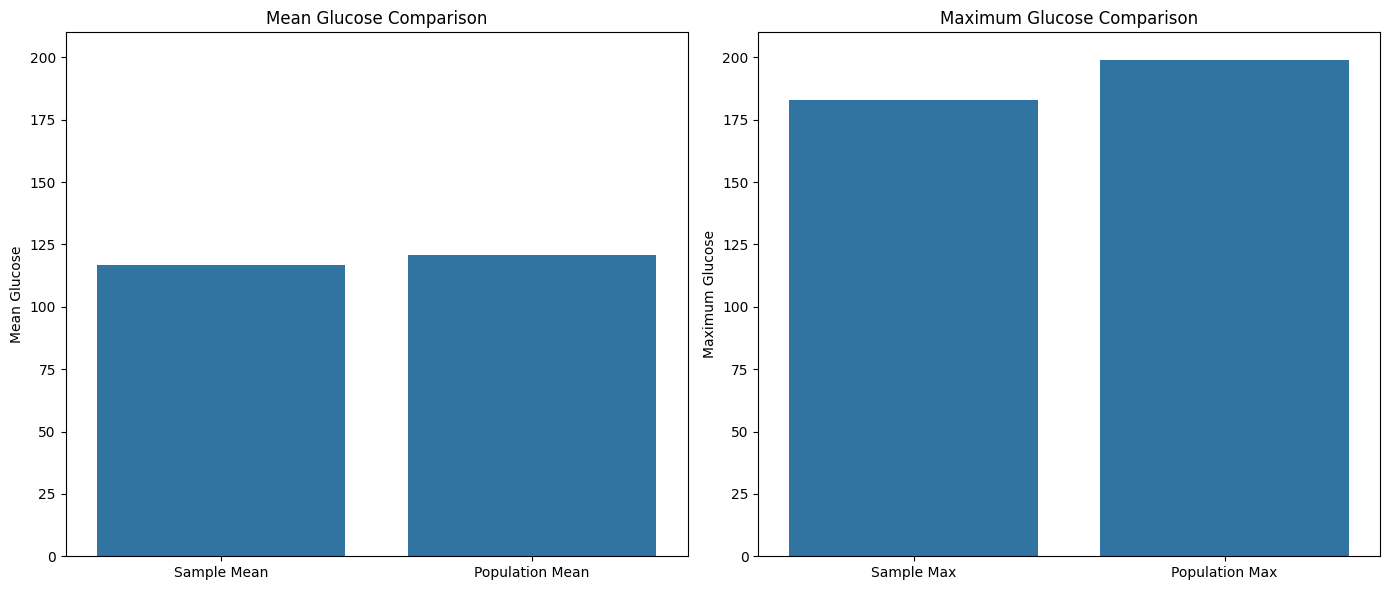

In [7]:
# Creating a bar chart for comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Mean Glucose Comparison
sns.barplot(x=['Sample Mean', 'Population Mean'], y=[sample_mean_glucose, population_mean_glucose], ax=ax[0])
ax[0].set_title('Mean Glucose Comparison')
ax[0].set_ylabel('Mean Glucose')
ax[0].set_ylim(0, 210)

# Maximum Glucose Comparison
sns.barplot(x=['Sample Max', 'Population Max'], y=[sample_max_glucose, population_max_glucose], ax=ax[1])
ax[1].set_title('Maximum Glucose Comparison')
ax[1].set_ylabel('Maximum Glucose')
ax[1].set_ylim(0, 210)

plt.tight_layout()
plt.show()


In [8]:
# Calculating the 98th percentile of BMI for the sample and the population
sample_98th_percentile_bmi = np.percentile(sample_data['BMI'], 98)
population_98th_percentile_bmi = np.percentile(diabetes_data['BMI'], 98)

sample_98th_percentile_bmi, population_98th_percentile_bmi

(40.248, 47.52599999999996)

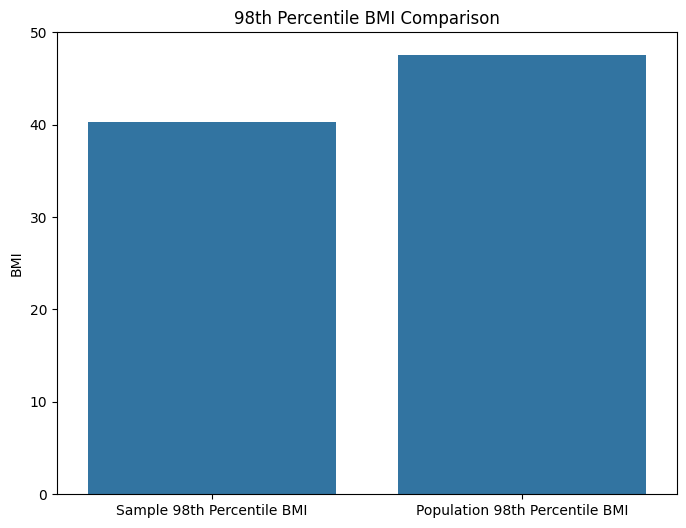

In [9]:
# Bar chart for the 98th percentile BMI comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Sample 98th Percentile BMI', 'Population 98th Percentile BMI'],
            y=[sample_98th_percentile_bmi, population_98th_percentile_bmi])
plt.title('98th Percentile BMI Comparison')
plt.ylabel('BMI')
plt.ylim(0, 50)
plt.show()


In [10]:
# Number of bootstrap samples and size of each sample
n_samples = 500
sample_size = 150

# Arrays to hold bootstrap statistics
bootstrap_means = np.zeros(n_samples)
bootstrap_stds = np.zeros(n_samples)
bootstrap_percentiles = np.zeros(n_samples)  # 50th percentile (median)

# Performing bootstrap sampling
np.random.seed(42)  # for reproducibility
for i in range(n_samples):
    bootstrap_sample = diabetes_data['BloodPressure'].sample(n=sample_size, replace=True)
    bootstrap_means[i] = bootstrap_sample.mean()
    bootstrap_stds[i] = bootstrap_sample.std()
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 50)

# Calculating population statistics for BloodPressure
population_mean_bp = diabetes_data['BloodPressure'].mean()
population_std_bp = diabetes_data['BloodPressure'].std()
population_percentile_bp = np.percentile(diabetes_data['BloodPressure'], 50)

bootstrap_mean_avg = bootstrap_means.mean()
bootstrap_std_avg = bootstrap_stds.mean()
bootstrap_percentile_avg = bootstrap_percentiles.mean()

(bootstrap_mean_avg, bootstrap_std_avg, bootstrap_percentile_avg), (population_mean_bp, population_std_bp, population_percentile_bp)


((69.17692000000001, 19.073717755676082, 71.502),
 (69.10546875, 19.355807170644777, 72.0))

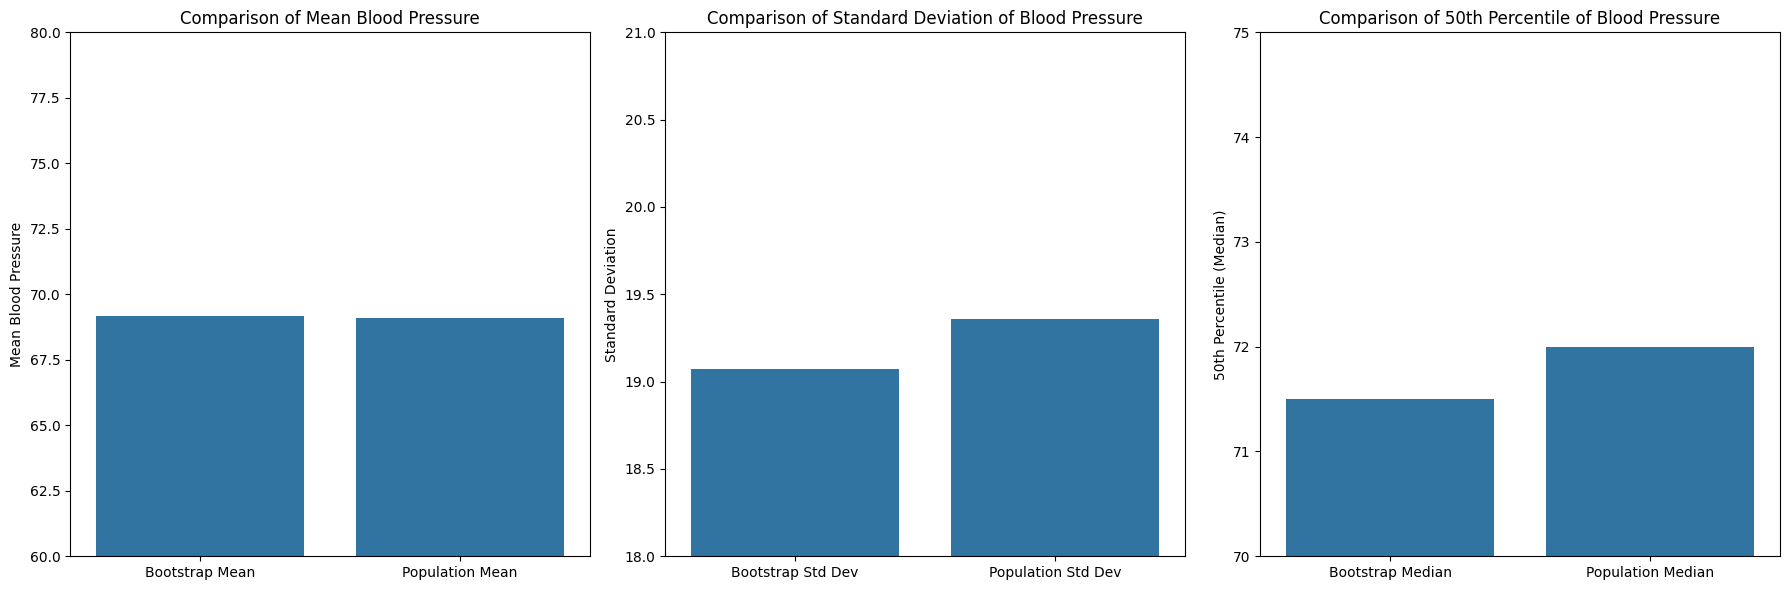

In [11]:
#  bar chart for comparison of Bootstrap Estimates vs Population Statistics
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Comparison of Means
sns.barplot(x=['Bootstrap Mean', 'Population Mean'],
            y=[bootstrap_mean_avg, population_mean_bp], ax=ax[0])
ax[0].set_title('Comparison of Mean Blood Pressure')
ax[0].set_ylabel('Mean Blood Pressure')
ax[0].set_ylim(60, 80)  # Setting limits for better visualization

# Comparison of Standard Deviations
sns.barplot(x=['Bootstrap Std Dev', 'Population Std Dev'],
            y=[bootstrap_std_avg, population_std_bp], ax=ax[1])
ax[1].set_title('Comparison of Standard Deviation of Blood Pressure')
ax[1].set_ylabel('Standard Deviation')
ax[1].set_ylim(18, 21)

# Comparison of 50th Percentiles
sns.barplot(x=['Bootstrap Median', 'Population Median'],
            y=[bootstrap_percentile_avg, population_percentile_bp], ax=ax[2])
ax[2].set_title('Comparison of 50th Percentile of Blood Pressure')
ax[2].set_ylabel('50th Percentile (Median)')
ax[2].set_ylim(70, 75)

plt.tight_layout()
plt.show()

# Findings

The bootstrap method involves taking many samples from a dataset, where each sample is created by randomly selecting data points with replacement (meaning the same data point can appear more than once in a sample). This technique is used to understand how much the statistics calculated from these samples (like the mean or median) might vary and how closely they match the overall characteristics of the entire dataset (the population).

From my analysis:

**Mean and Median**:

The averages (means) and middle values (medians) calculated from these repeated samples were very close to those from the entire dataset. This shows that the bootstrap method is effective in providing a good estimate of the dataset’s overall characteristics.

**Standard Deviation**:

The standard deviation, which measures how spread out the data points are, was slightly different between the bootstrap samples and the full dataset. This minor difference indicates that the spread of data in the bootstrap samples might not perfectly match the spread in the full dataset, but the difference is small.

In simpler terms, the bootstrap method does a good job of estimating the dataset’s key properties (like the average and middle value), even though it uses repeated sampling. This method helps in understanding the dataset’s behavior and ensuring that our calculations are robust and reliable.